# Homework 10

## Exercise 1

My preliminary decision is an article "Algorithms for Solving Rubik’s Cubes". The article seems the most attractive to me because of its conciseness and proximity to mundane life. I can solve the Rubik's cube by one of the algorithms handy for humans and it is intriguing for me to see how computers can do it and maybe do it with a better optimized strategy.

## Exercise 2

<table>
  <tr>
    <th style='text-align: center'>Recursion Tree for calculate_magic_number(2, 2)</th>
  </tr>
  <tr>
    <td><img src='rec_tree.png'></td>
  </tr>
</table>

There are 14 overlapping function calls in total.

<br>
Recursive structure of the function:

$f(a, b) = \mathrm{sum} \begin{cases} f(a - 1, b) \\ f(a, b - 1) \\ f(a - 1, b - 1) \end{cases}$

with $f(0, k) = k; f(k, 0) = k$.

<br>
Let's propose a Dynamic Programming algorithm:

**Input:** $a$, $b$.

**Output:** Value $T[a][b]$ in 2D-array $T$ of size $(a + 1, b + 1)$.

$T \leftarrow$ array of size $(a + 1, b + 1)$

**for** $i = 0$ **to** $a + 1$ **do** $T[i][0] \leftarrow i$

**for** $j = 0$ **to** $b + 1$ **do** $T[0][j] \leftarrow j$

**for** $j = 1$ **to** $b + 1$ **do**

&emsp;**for** $i = 1$ **to** $a + 1$ **do**
        
&emsp;&emsp;$T[i][j] \leftarrow T[i - 1][j] + T[i][j - 1] + T[i - 1][j - 1]$

<br>
The table $T$ for calculate_magic_number(2, 2) looks like:

<table>
    <tr>
        <td></td>
        <td></td>
        <td>b</td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td style='border:1px solid black;'>0</td>
        <td style='border:1px solid black;'>1</td>
        <td style='border:1px solid black;'>2</td>
    </tr>
    <tr>
        <td>a</td>
        <td style='border:1px solid black;'>1</td>
        <td style='border:1px solid black;'>2</td>
        <td style='border:1px solid black;'>5</td>
    </tr>
    <tr>
        <td></td>
        <td style='border:1px solid black;'>2</td>
        <td style='border:1px solid black;'>5</td>
        <td style='border:1px solid black;'><p style='color:red'>12</p></td>
    </tr>
</table>

calculate_magic_number(2, 2) = $T[2][2]$ = 12.

**Time Complexity**

Let $n$ be $\mathrm{max}(a, b)$.

Recursive algorithm complexity: $O(3^n)$.

Dynamic Programming algorithm complexity: $O(n^2)$.

## Exercise 4

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [44]:
def dynamic_time_warping(s1, s2, dist_fn):
    matrix = np.full((len(s1), len(s2)), None)
    pred = np.full((len(s1), len(s2)), None)

    matrix[0][0] = dist_fn((0, s1[0]), (0, s2[0]))
    
    for i in range(1, len(s1)):
        matrix[i][0] = dist_fn((i, s1[i]), (0, s2[0])) + matrix[i - 1][0]
        pred[i][0] = (i - 1, 0)
    for j in range(1, len(s2)):
        matrix[0][j] = dist_fn((0, s1[0]), (j, s2[j])) + matrix[0][j - 1]
        pred[0][j] = (0, j - 1)
        
    for i in range(1, len(s1)):
        for j in range(1, len(s2)):
            neighbours = [(i, j - 1), (i - 1, j), (i - 1, j - 1)]
            min_neighbour_index = np.argmin([matrix[k] for k in neighbours])
            min_neighbour = neighbours[min_neighbour_index]
            
            matrix[i][j] = matrix[min_neighbour] + dist_fn((i, s1[i]), (j, s2[j]))
            pred[i][j] = min_neighbour
    
    return get_alignments(pred), matrix[-1][-1]

In [45]:
def get_alignments(pred):
    alignments = []
    current = (pred.shape[0] - 1, pred.shape[1] - 1)
    
    while current is not None:
        alignments.append(current)
        current = pred[current]
    
    # reverse alignments order
    return alignments[::-1]

In [66]:
def plot_sequences(s1, s2, alignments, shift=0):
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.xlabel('s1')
    plt.ylabel('s2')
    plt.title('Time Warp')
    
    for pair in alignments:
        plt.plot([pair[0], pair[1]], [s1[pair[0]], s2[pair[1]] + shift], color='red', linestyle='--')
        
    plt.plot(range(len(s1)), s1, color='blue')
    plt.plot(range(len(s2)), [y + shift for y in s2], color='green')
    
    x = range(max(len(s1), len(s2)))
    plt.xticks(x)
    plt.grid()
    
    plt.show()

In [47]:
s1 = [2, 5, 5, 7, 9, 1, 6, 6, 8, 9, 1, 6, 6, 8, 9] 
s2 = [1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 7, 7, 8, 7]
s3 = [4, 2, 1, 4, 8, 8, 9, 3, 2, 3, 2, 2, 6, 9, 2, 1, 1, 6, 1] 
s4 = [1, 5, 7, 3, 7, 2, 8, 9, 9, 2, 2, 3, 7, 8] 
s5 = [3, 2, 2, 1, 1, 8, 3, 2, 6, 9, 1, 6, 1] 
s6 = [1, 1, 1, 3, 3, 2, 1, 1, 7, 7, 7]

sequences = [s1, s2, s3, s4, s5, s6]

In [69]:
dist_matrix = np.zeros((len(sequences), len(sequences)))
align_matrix = np.full((len(sequences), len(sequences)), None)

for i, s1 in enumerate(sequences):
    for j, s2 in enumerate(sequences):
        if i == j:
            dist_matrix[i][j] = np.inf
            continue
        
        alignments, dist = dynamic_time_warping(s1, s2, euclidean_distance)
        dist_matrix[i][j] = dist
        align_matrix[i][j] = alignments

print('\t\tMATRIX OF TOTAL DISTANCES BETWEEN Si and Sj\n')
print(dist_matrix)

		MATRIX OF TOTAL DISTANCES BETWEEN Si and Sj

[[        inf 50.0093028  71.05556227 23.71477664 37.44257899 46.70836386]
 [50.0093028          inf 57.36869464 43.73304407 39.18857216 33.77338717]
 [71.05556227 57.36869464         inf 64.55066532 49.06566951 84.17957758]
 [23.71477664 43.73304407 64.55066532         inf 38.02848514 42.65401203]
 [37.44257899 39.18857216 49.06566951 38.02848514         inf 32.9022835 ]
 [46.70836386 33.77338717 84.17957758 42.65401203 32.9022835          inf]]


The matrix is symmetrical. Indeed, time alignments should be the same between the same pair of sequences, so at least we did the calculations right.

In [51]:
nearest_seq = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
print(nearest_seq)

(0, 3)


The nearest sequences are s1 and s4.

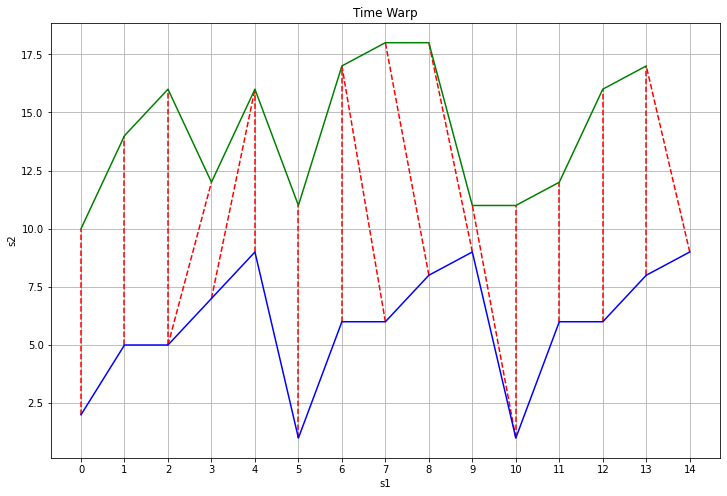

In [67]:
s1, s2 = nearest_seq
plot_sequences(sequences[s1], sequences[s2], align_matrix[s1][s2], shift=9)

## Exercise 5

In a Knapsack Problem there are $n$ items, each with its own value and weight. The task is to pick items (without repeats) so that we don't exceed the maximum total weight $w_t$ and maximize the total cost of the items. The analogy that gave the name to the problem is putting items in a knapsack with a limited capacity.

The real life situation may be that we pack for a trip and have a set of foodstuffs, each with its volume and calories. So, we try to fit the products into the knapsack and maximize the number of calories. Here, the 'weights' are the volumes and the 'costs' are the calories.

Let's solve the proposed task:

<img src='table.png'>

Now, moving from the rightmost bottom cell, trace the path of selections. Clearly, the item O4 is not selected because the value T[3][11]=21 comes from the top. Now me move one row up and check the same thing. T[2][11]=21 does not come from the top, so the item O3 is selected. Move w(O3)=7 steps back and one row up. The current location is T[2][4]=7. Likewise, the value 7 does not come from the top cell, thus the item O2 is included in the knapsack. Move w(O2)=4 steps back and one row up. The current cell is T[0][0]=0, the initial cell, so the algorithm is finished.

Included items: O2 and O3. Total weight: 4 + 7 = 11. Total cost: 14 + 7 = 21.

Space complexity of the solution: $O(wN)$, where $w$ is a weight constraint and $N$ is a number of items.